In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import CategoricalDtype

df = pd.read_csv('data.csv')

print(df.describe())

               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.

In [106]:
print('Column', 'type', 'NAs')
for i in df.columns:
    print(i,df[i].dtypes, df[i].isna().sum())

Column type NAs
country object 0
year int64 0
sex object 0
age object 0
suicides_no int64 0
population int64 0
suicides/100k pop float64 0
country-year object 0
HDI for year float64 19456
 gdp_for_year ($)  object 0
gdp_per_capita ($) int64 0
generation object 0


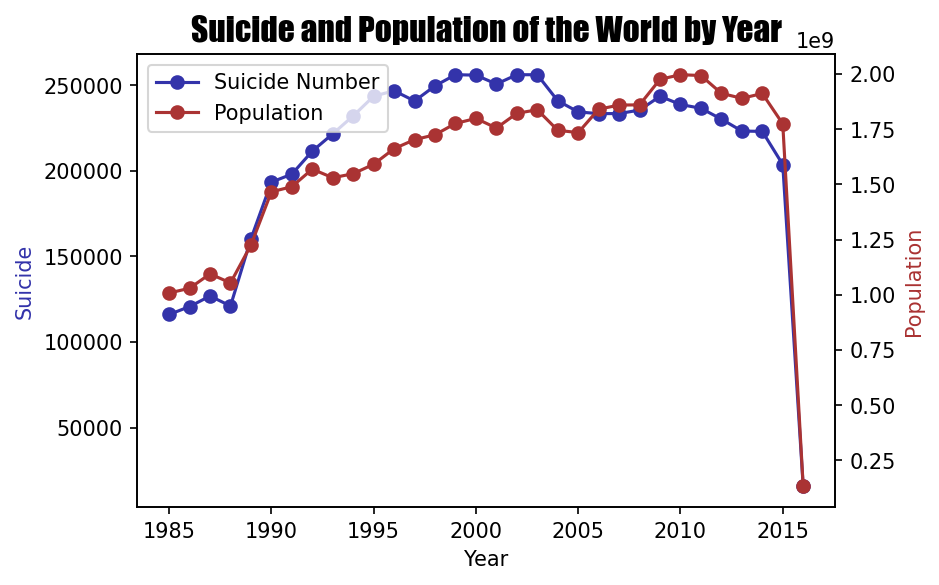

In [107]:
df_suicide_by_year = df[['year','suicides_no']].groupby('year').sum()
df_population_by_year = df[['year','population']].groupby('year').sum()

fig, ax = plt.subplots(figsize=(6,4), dpi=150)
ax.set_title('Suicide and Population of the World by Year', fontdict={'name':'fantasy','fontsize':16})

l1,=ax.plot(df_suicide_by_year.index, df_suicide_by_year['suicides_no'], label='Suicide Number', marker='o',color='#3333AA')
ax2 = ax.twinx()
l2,=ax2.plot(df_population_by_year.index, df_population_by_year['population'], label='Population', marker='o', color='#AA3333')
plt.legend([l1,l2],['Suicide Number','Population'])
ax.set_xlabel('Year')
ax.set_ylabel('Suicide', color='#3333AA')
ax2.set_ylabel('Suicide', color='#AA3333')
ax2.set_ylabel('Population')
plt.show()

In [108]:
aux = []
for i in df['year'].sort_values().unique():
    aux.append(df['country'].sort_values().nunique())

for i in range(1,len(aux)):
    if aux[i] != aux[i-1]:
        print(i)
        print(aux[i])
        print(aux[i-1])
print('OK')

OK


In [109]:
print(df[df['year']==2016].sort_values(by='country'))

        country  year     sex          age  suicides_no  population  \
1248    Armenia  2016    male    75+ years           12       61956   
1249    Armenia  2016    male  55-74 years           16      237813   
1250    Armenia  2016    male  35-54 years           16      350633   
1251    Armenia  2016    male  15-24 years            5      202220   
1252    Armenia  2016  female    75+ years            2      102414   
...         ...   ...     ...          ...          ...         ...   
25306  Thailand  2016    male  15-24 years          322     4736305   
25307  Thailand  2016  female    75+ years           69     1589015   
25308  Thailand  2016  female  55-74 years          222     6049756   
25309  Thailand  2016  female  35-54 years          375    10629684   
25311  Thailand  2016  female  15-24 years           60     4525574   

       suicides/100k pop  country-year  HDI for year  gdp_for_year ($)   \
1248               19.37   Armenia2016           NaN     10,546,135,160 

In [110]:
print(df[df['year']==2015].sort_values(by='country'))

                   country  year     sex          age  suicides_no  \
576    Antigua and Barbuda  2015  female  55-74 years            1   
587    Antigua and Barbuda  2015    male    75+ years            0   
586    Antigua and Barbuda  2015    male  55-74 years            0   
585    Antigua and Barbuda  2015    male   5-14 years            0   
583    Antigua and Barbuda  2015    male  25-34 years            0   
...                    ...   ...     ...          ...          ...   
27545              Uruguay  2015    male  55-74 years          133   
27544              Uruguay  2015    male    75+ years           58   
27554              Uruguay  2015    male   5-14 years            3   
27548              Uruguay  2015    male  15-24 years           74   
27555              Uruguay  2015  female   5-14 years            2   

       population  suicides/100k pop             country-year  HDI for year  \
576          6403              15.62  Antigua and Barbuda2015           NaN   
5

In [111]:
df = df[df['year']!=2016]
print(df.describe())

               year   suicides_no    population  suicides/100k pop  \
count  27660.000000  27660.000000  2.766000e+04       27660.000000   
mean    2001.173102    243.413485  1.850689e+06          12.812597   
std        8.418754    904.490185  3.920658e+06          18.972063   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1994.000000      3.000000  9.753525e+04           0.910000   
50%     2002.000000     25.000000  4.307250e+05           5.980000   
75%     2008.000000    132.000000  1.491041e+06          16.602500   
max     2015.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27660.000000  
mean       0.776601        16815.568330  
std        0.093367        18861.585497  
min        0.483000          251.000000  
25%        0.713000         3436.000000  
50%        0.779000         9283.000000  
75%        0.855000        24796.000000  
max        0.944000       126352.

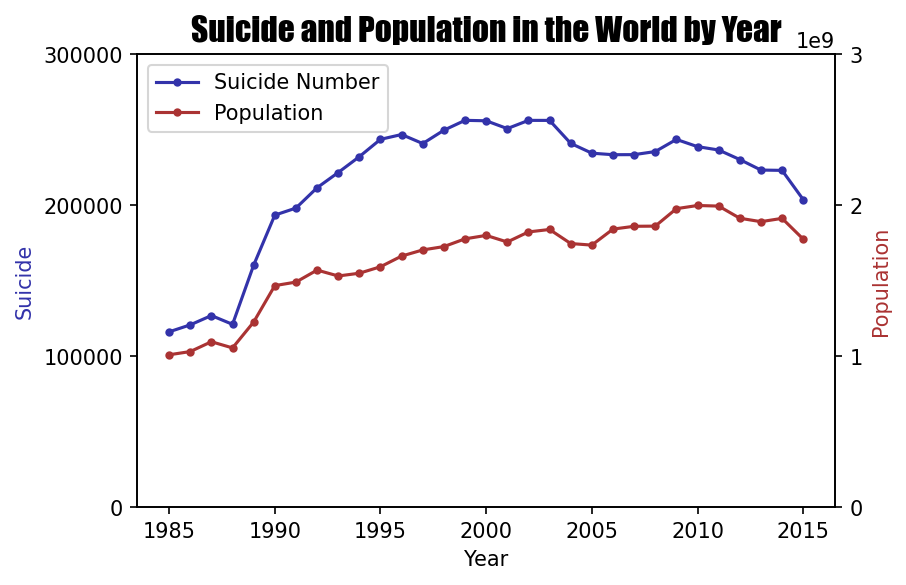

In [112]:
df_suicide_by_year = df[['year','suicides_no']].groupby('year').sum()
df_population_by_year = df[['year','population']].groupby('year').sum()

fig, ax = plt.subplots(figsize=(6,4), dpi=150)
ax.set_title('Suicide and Population in the World by Year', fontdict={'name':'fantasy','fontsize':16})

l1,=ax.plot(df_suicide_by_year.index, df_suicide_by_year['suicides_no'], label='Suicide Number', marker='.',color='#3333AA')
ax2 = ax.twinx()
l2,=ax2.plot(df_population_by_year.index, df_population_by_year['population'], label='Population', marker='.', color='#AA3333')
plt.legend([l1,l2],['Suicide Number','Population'], loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('Suicide', color='#3333AA')
ax2.set_ylabel('Suicide', color='#AA3333')
ax2.set_ylabel('Population')
ax.set_yticks([0, 100000, 200000, 300000])
ax2.set_yticks([0, 1000000000, 2000000000, 3000000000])
plt.show()

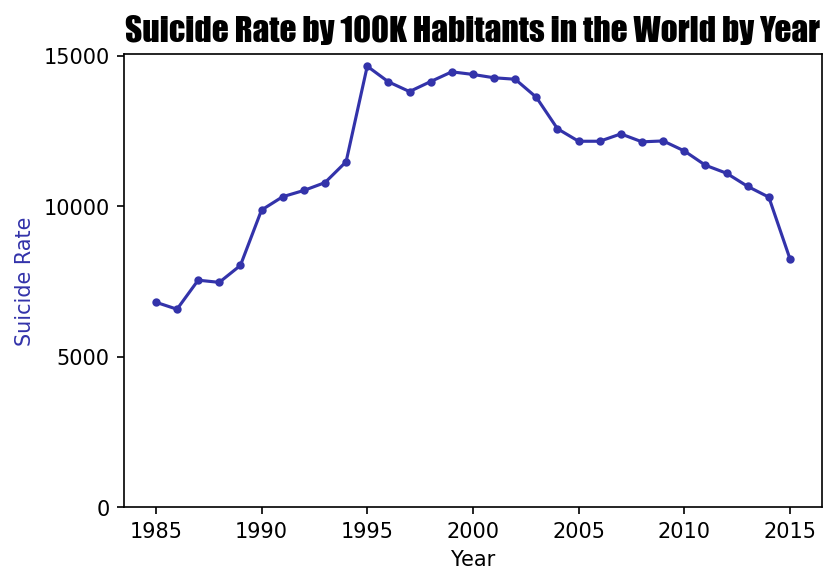

In [113]:
df_suicide_per_100k_by_year = df[['year','suicides/100k pop']].groupby('year').sum()
plt.figure(figsize=(6,4), dpi=150)
plt.title('Suicide Rate by 100K Habitants in the World by Year', fontdict={'name':'fantasy','fontsize':16})
plt.plot(df_suicide_per_100k_by_year.index,df_suicide_per_100k_by_year, marker='.',color='#3333AA')
plt.yticks([0, 5000, 10000, 15000])
plt.ylabel('Suicide Rate', color='#3333AA')
plt.xlabel('Year')
plt.show()

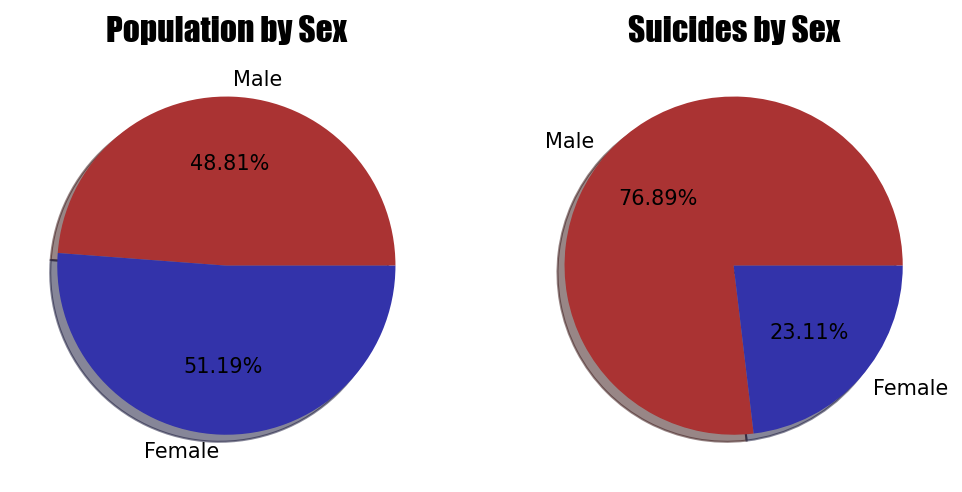

In [114]:
suicides_male = df[df['sex']=='male']['suicides_no'].sum()
suicides_female = df[df['sex']=='female']['suicides_no'].sum()
population_male = df[df['sex']=='male']['population'].sum()
population_female = df[df['sex']=='female']['population'].sum()
fig, ax = plt.subplots(1,2,figsize=(8,4), dpi=150)

ax[0].set_title('Population by Sex', fontdict={'name':'fantasy','fontsize':16})
ax[1].set_title('Suicides by Sex', fontdict={'name':'fantasy','fontsize':16})
ax[0].pie([population_male, population_female], labels=['Male', 'Female'], autopct='%0.2f%%', shadow=True, colors=['#AA3333', '#3333AA'])
ax[1].pie([suicides_male, suicides_female], labels=['Male', 'Female'], autopct='%0.2f%%', shadow=True, colors=['#AA3333', '#3333AA'])
plt.show()

In [115]:
print(df['generation'].unique())

['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


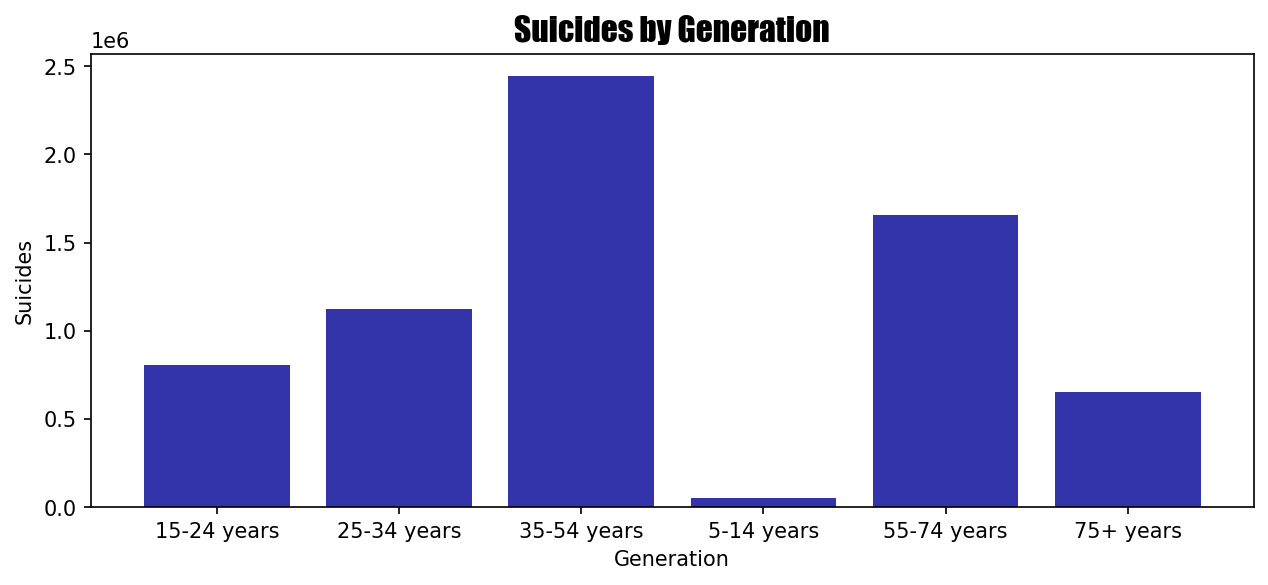

In [130]:
generation_order = CategoricalDtype(
    ['G.I. Generation','Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z'], 
    ordered=True
)
df['generation'] = df['generation'].astype(generation_order)
df_suicide_by_generation = df[['age', 'suicides_no']].groupby('age').sum()
plt.figure(figsize=(10,4), dpi=150)
plt.title('Suicides by Generation', fontdict={'name':'fantasy','fontsize':16})
plt.bar(df_suicide_by_generation.index, df_suicide_by_generation['suicides_no'], color=['#3333AA'])
plt.ylabel('Suicides')
plt.xlabel('Generation')
plt.show()

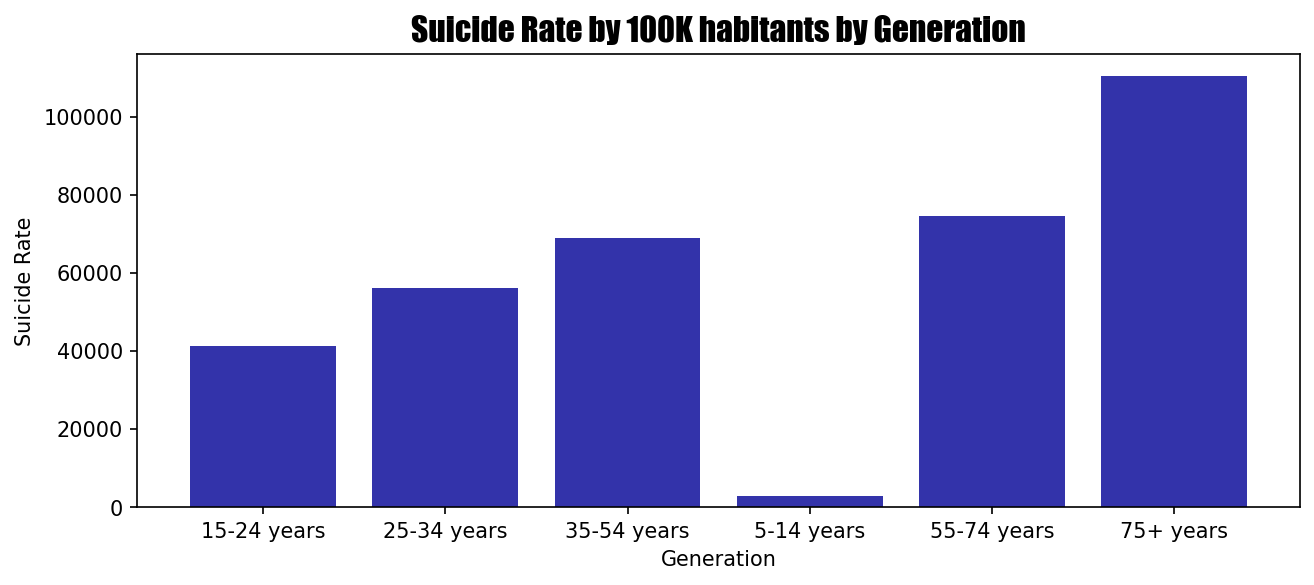

In [123]:
df_suicide_rate_by_generation = df[['age', 'suicides/100k pop']].groupby('age').sum()
plt.figure(figsize=(10,4), dpi=150)
plt.title('Suicide Rate by 100K habitants by Generation', fontdict={'name':'fantasy','fontsize':16})
plt.bar(df_suicide_rate_by_generation.index, df_suicide_rate_by_generation['suicides/100k pop'], color=['#3333AA'])
plt.ylabel('Suicide Rate')
plt.xlabel('Generation')
plt.show()

In [122]:
print(df['age'].unique())

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


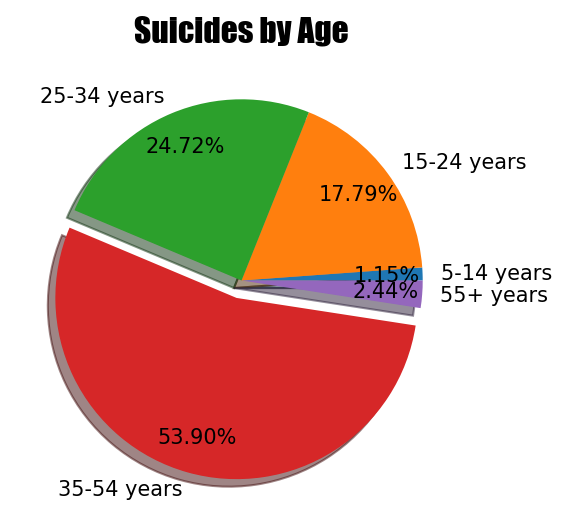

In [134]:
df_5_14 = df[df['age'] == '5-14 years']['suicides_no'].sum()
df_15_24 = df[df['age'] == '15-24 years']['suicides_no'].sum()
df_25_34 = df[df['age'] == '25-34 years']['suicides_no'].sum()
df_35_54 = df[df['age'] == '35-54 years']['suicides_no'].sum()
df_55 = df[(df['age'] == '55-44 years') | (df['age'] == '75+ years')]['suicides/100k pop'].sum()

plt.figure(figsize=(4,4), dpi=150)
plt.title('Suicides by Age', fontdict={'name':'fantasy','fontsize':16})

plt.pie([df_5_14, df_15_24, df_25_34, df_35_54, df_55], labels=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55+ years'], pctdistance= 0.8, autopct='%0.2f%%', shadow=True, explode=[0,0,0,0.1,0])             
plt.show()